<a href="https://colab.research.google.com/github/Disha-16/Fraud_Detection_in_Ethereum_Transaction_using_Ensemble_Learning/blob/main/Final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

pip install colorama


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.4 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For Handling Imbalanced Dataset
import imblearn as imb

# For Create Beautiful Reports
from colorama import Fore

# Machine loarning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# For save our model
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import catboost as ctb
import warnings
warnings.filterwarnings('ignore')

In [7]:
path = '/content/drive/MyDrive/Fraud_Detection_in_Ethereum_Transaction/Complete.csv'
df = pd.read_csv(path)
df.sample(4)

,Index,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,...,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
2375,197,0x2634702e4b9116a15120f3383b0a4785cd780425,0,17.34,0.18,69.72,4,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1976,1977,0xe84a5d3eebbf460b005a9d4d58f1c3576c7036ce,1,5937.69,3590.54,49988.32,6,4,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2852,674,0x86e064302d13e83ab921bcaaed18e6948b1beb3d,0,161.45,0.82,324.53,2,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
595,596,0x435fe8272698ca7032c41cbe5d412e0369d159ff,1,0.00,329.72,5605.28,0,17,0,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.iloc[:, 2:]
df

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,...,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
0,1,1457.31,34.12,4815.43,3,13,0,10,3,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3976.50,834.77,9622.53,2,2,0,1,2,0.586269,...,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
2,1,112.90,31.87,321.42,2,3,0,3,1,0.001020,...,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
3,1,2300.37,65.10,73091.00,29,98,0,89,26,0.000784,...,0.0,81324.0746,5232.816018,0.0,0.0,0.0,22.0,37.0,OCoin,OCoin
4,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676,0,0.00,0.00,1.52,1,1,0,1,1,4.000000,...,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
4677,0,9800.26,9384.37,489235.00,3,49,0,4,1,0.095005,...,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,12.0,,VIU
4678,0,0.00,0.00,173.97,1,1,0,1,1,0.700000,...,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
4679,0,7.72,502.02,1521.52,2,3,0,1,1,0.010000,...,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0


In [9]:
def explore_data(data):
    print(f'Size of Data Frame: {data.size}\n\n')
    print(f'Shape of Data Frame : {data.shape}\n\n')
    print(f'Data Frame Columns: {data.columns}\n\n')
    print(f'Data Frame Data Types:\n{data.dtypes}\n\n')
    print(f'Data Frame Head: \n{data.head(5)}\n\n')
    print(f'Data Frame tail: \n{data.tail(5)}\n\n')
    print(f'Data Frame Information:\n{data.info()}\n\n')
    print(f'Data Frame Null Values: \n{data.isnull().sum()}\n\n')
    print(f'Descriptions of Data Frame: \n{data.describe()}\n\n')

explore_data(df)

Size of Data Frame: 224688


Shape of Data Frame : (4681, 48)


Data Frame Columns: Index(['FLAG', 'Avg_min_between_sent_tnx', 'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last_(Mins)', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts', 'Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions_(including_tnx_to_create_contract)',
       'total_Ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'Total_ERC20_tnxs',
       'ERC20_total_Ether_received', 'ERC20_total_ether_sent',
       'ERC20_total_Ether_sent_contract', 'ERC20_uniq_sent_addr',
       'ERC20_uniq_rec_addr', 'ERC20_uniq_sent_addr.1',
       'ERC20_uniq_rec_contract_addr', 'ERC20_avg_time_

In [10]:
category = df.select_dtypes('O').columns.astype('category')
df[category]

,ERC20_most_sent_token_type,ERC20_most_rec_token_type
0,NaN,NaN
1,,Blockwell say NOTSAFU
2,,Blockwell say NOTSAFU
3,OCoin,OCoin
4,NaN,NaN
...,...,...
4676,0,0
4677,,VIU
4678,0,0
4679,0,0


In [11]:
df.drop(columns=category, inplace=True)

In [12]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

FLAG                                                     0
Avg_min_between_sent_tnx                                 0
Avg_min_between_received_tnx                             0
Time_Diff_between_first_and_last_(Mins)                  0
Sent_tnx                                                 0
Received_Tnx                                             0
Number_of_Created_Contracts                              0
Unique_Received_From_Addresses                           0
Unique_Sent_To_Addresses                                 0
min_value_received                                       0
max_value_received                                       0
avg_val_received                                         0
min_val_sent                                             0
max_val_sent                                             0
avg_val_sent                                             0
min_value_sent_to_contract                               0
max_val_sent_to_contract                                

In [13]:
no_var = df.var() == 0
df.var()[no_var]

min_value_sent_to_contract             0.0
max_val_sent_to_contract               0.0
avg_value_sent_to_contract             0.0
total_ether_sent_contracts             0.0
ERC20_avg_time_between_sent_tnx        0.0
ERC20_avg_time_between_rec_tnx         0.0
ERC20_avg_time_between_rec_2_tnx       0.0
ERC20_avg_time_between_contract_tnx    0.0
ERC20_min_val_sent_contract            0.0
ERC20_max_val_sent_contract            0.0
ERC20_avg_val_sent_contract            0.0
dtype: float64

In [14]:
df.drop(df.var()[no_var].index, axis=1, inplace=True)

In [15]:
df.shape

(4681, 35)

Dropping those features which have bad distribution

In [16]:
no_pattern_cols = []
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The Column {i}: has this uniques values:\n{df[i].value_counts()}\n')
        print('-'*40)
        no_pattern_cols.append(i)

The Column ERC20_uniq_sent_addr.1: has this uniques values:
ERC20_uniq_sent_addr.1
0.0    4661
1.0      20
Name: count, dtype: int64

----------------------------------------


In [17]:
no_pattern_cols

['ERC20_uniq_sent_addr.1']

In [18]:
df.drop(columns=no_pattern_cols, inplace=True)

In [19]:
explore_data(df)

Size of Data Frame: 159154


Shape of Data Frame : (4681, 34)


Data Frame Columns: Index(['FLAG', 'Avg_min_between_sent_tnx', 'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last_(Mins)', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts', 'Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'total_transactions_(including_tnx_to_create_contract)',
       'total_Ether_sent', 'total_ether_received', 'total_ether_balance',
       'Total_ERC20_tnxs', 'ERC20_total_Ether_received',
       'ERC20_total_ether_sent', 'ERC20_total_Ether_sent_contract',
       'ERC20_uniq_sent_addr', 'ERC20_uniq_rec_addr',
       'ERC20_uniq_rec_contract_addr', 'ERC20_min_val_rec',
       'ERC20_max_val_rec', 'ERC20_avg_val_rec', 'ERC20_min_val_sent',
       'ERC20_max_val_sent', 'ERC20_avg_val_sent',
       'ERC20_uniq_sent_token_name', '

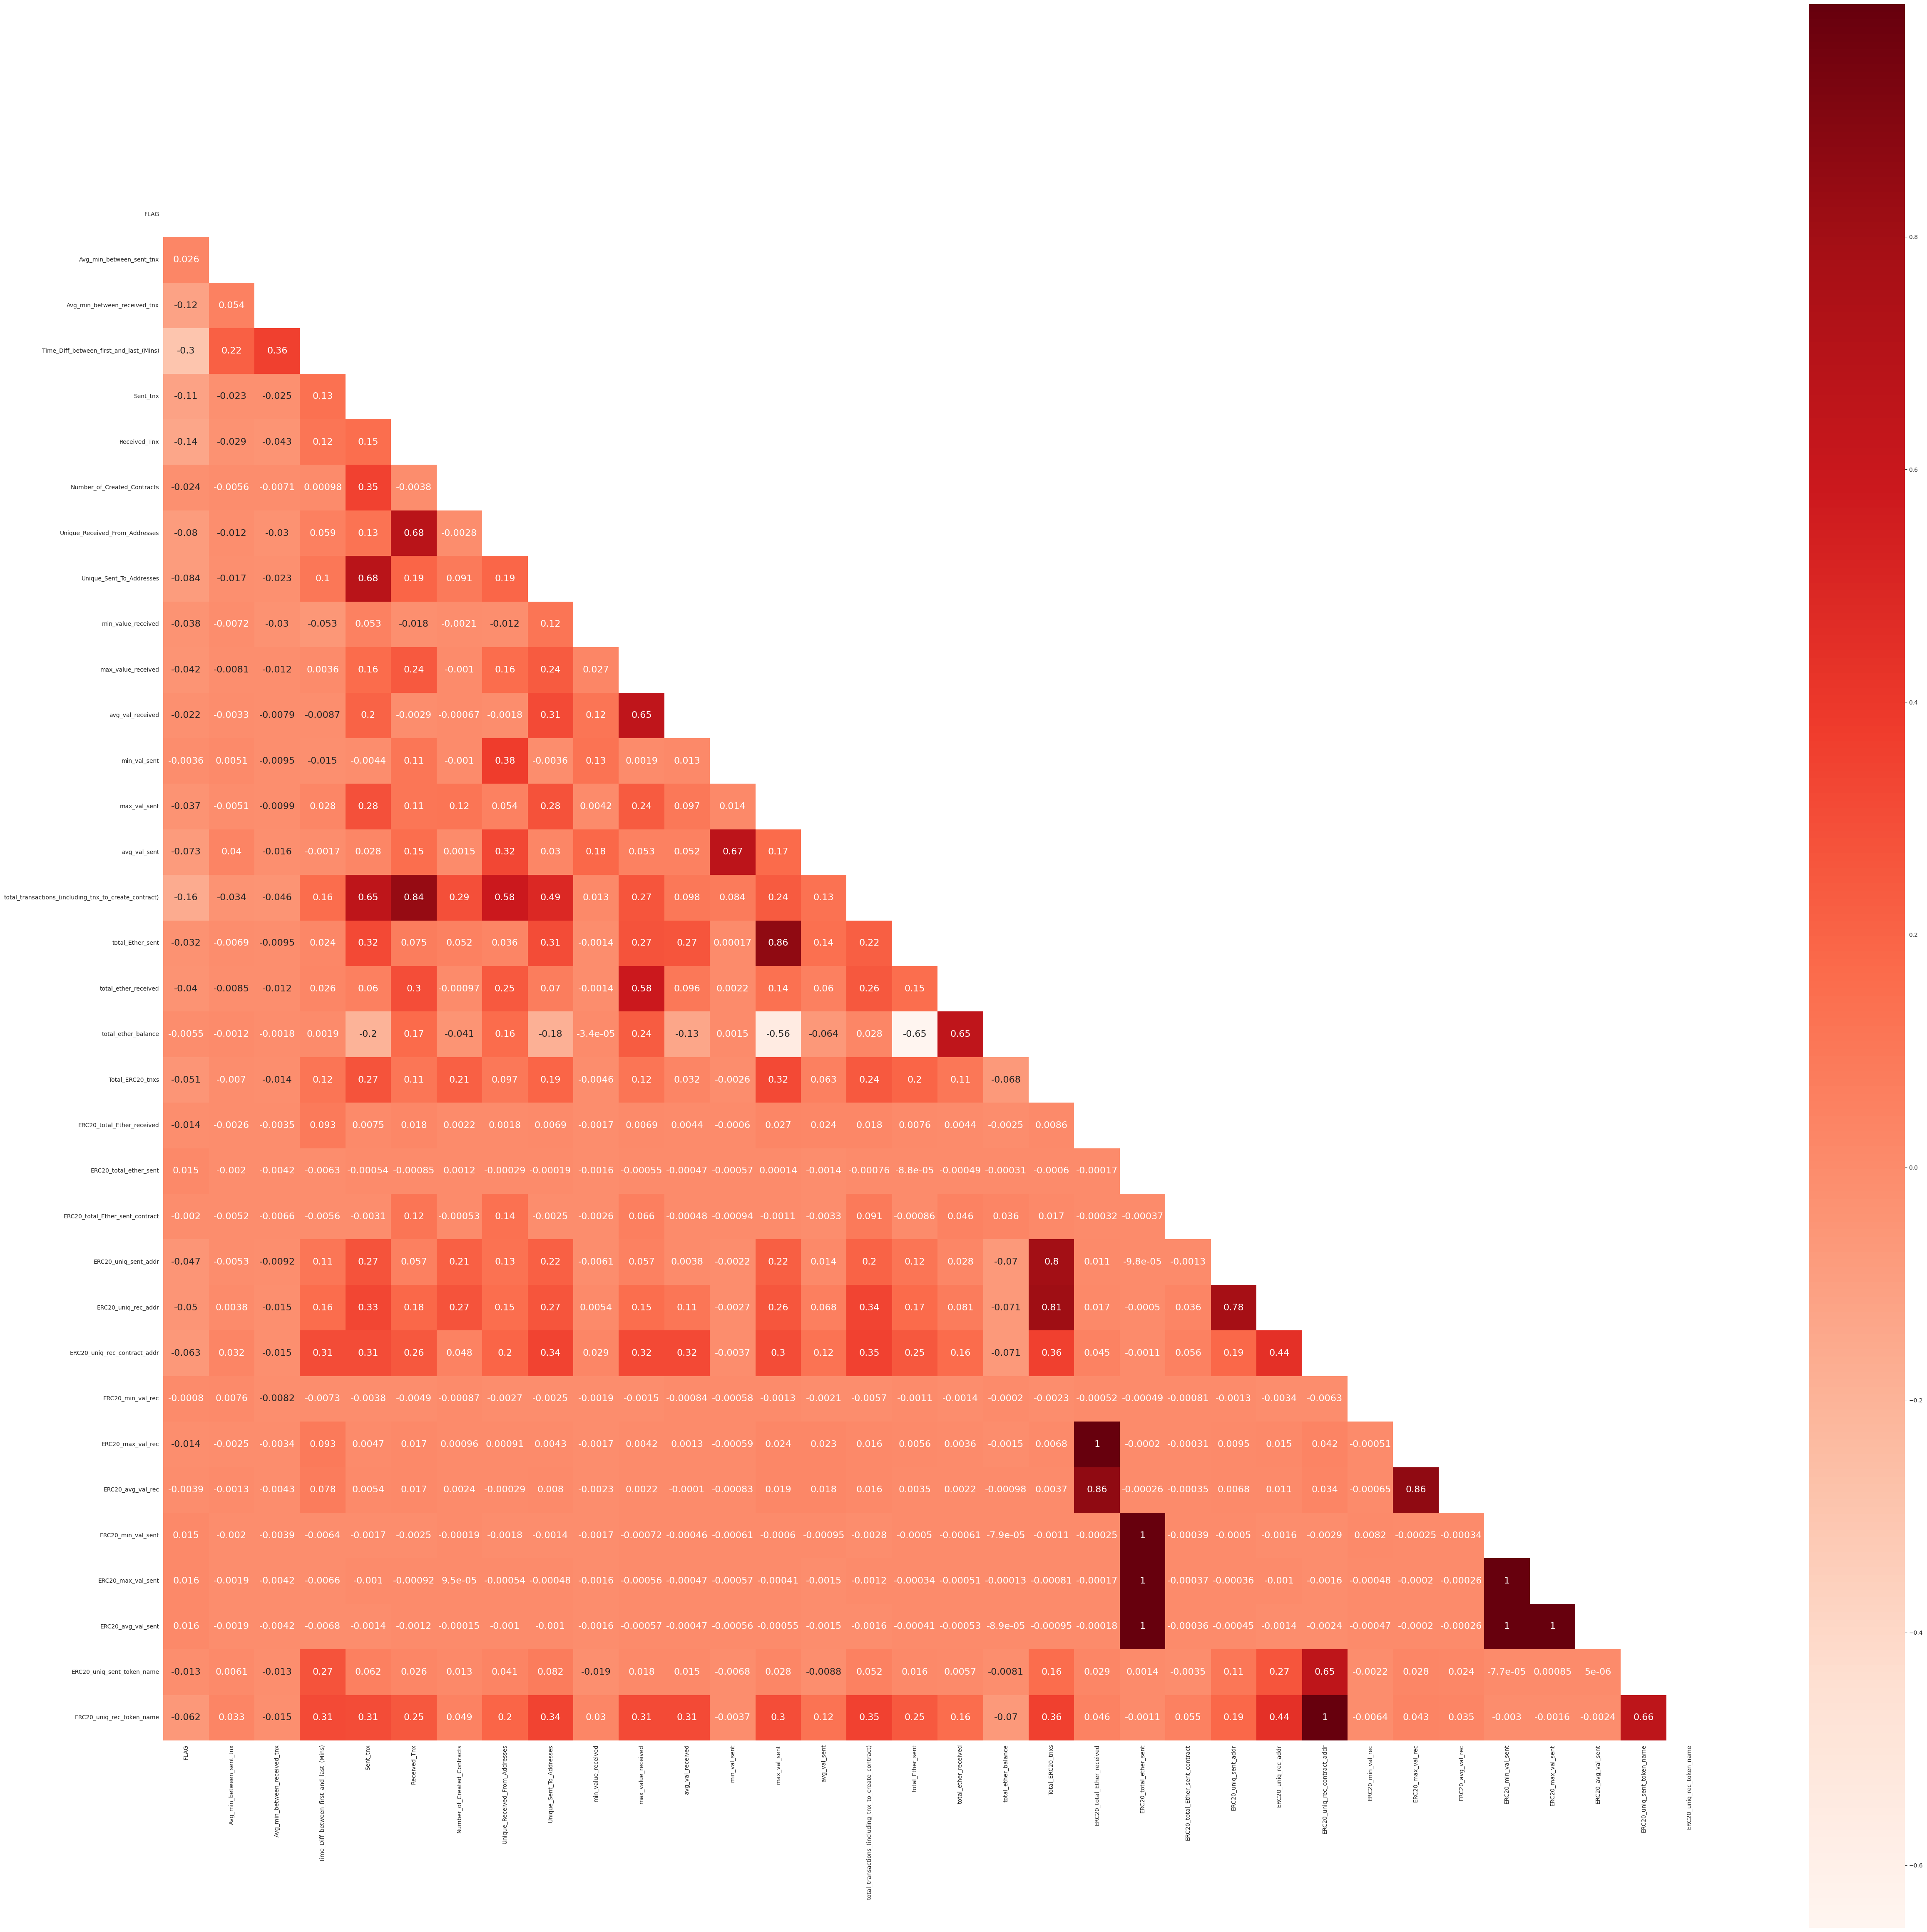

In [20]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(60, 60))
    sns.heatmap(corr, mask=mask, cmap='Reds', annot=True, square=True, annot_kws={'size': 16})

In [21]:

sorted_corr = corr.sort_values(by=['FLAG'], key=abs)
sorted_corr

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,...,ERC20_uniq_rec_addr,ERC20_uniq_rec_contract_addr,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name
ERC20_min_val_rec,-0.000796,0.007585,-0.008157,-0.007273,-0.003773,-0.004926,-0.000874,-0.002720,-0.002493,-0.001855,...,-0.003412,-0.006346,1.000000,-0.000509,-0.000651,0.008216,-0.000482,-0.000468,-0.002153,-0.006397
ERC20_total_Ether_sent_contract,-0.002004,-0.005161,-0.006611,-0.005556,-0.003114,0.120581,-0.000525,0.138033,-0.002549,-0.002625,...,0.035604,0.056057,-0.000808,-0.000311,-0.000352,-0.000394,-0.000368,-0.000364,-0.003464,0.055380
min_val_sent,-0.003630,0.005140,-0.009527,-0.014662,-0.004424,0.113236,-0.001016,0.376670,-0.003644,0.125096,...,-0.002660,-0.003748,-0.000575,-0.000591,-0.000826,-0.000609,-0.000568,-0.000561,-0.006795,-0.003713
ERC20_avg_val_rec,-0.003920,-0.001346,-0.004272,0.077847,0.005387,0.017049,0.002386,-0.000289,0.008046,-0.002317,...,0.010632,0.033869,-0.000651,0.863948,1.000000,-0.000340,-0.000258,-0.000258,0.023969,0.034805
total_ether_balance,-0.005541,-0.001230,-0.001758,0.001907,-0.197574,0.170252,-0.040967,0.163981,-0.182811,-0.000034,...,-0.070826,-0.071016,-0.000198,-0.001547,-0.000975,-0.000079,-0.000129,-0.000089,-0.008083,-0.070411
ERC20_uniq_sent_token_name,-0.012709,0.006076,-0.012672,0.272362,0.062215,0.025686,0.012943,0.041309,0.081989,-0.019088,...,0.269710,0.652181,-0.002153,0.028422,0.023969,-0.000077,0.000849,0.000005,1.000000,0.658710
ERC20_max_val_rec,-0.013856,-0.002514,-0.003438,0.092966,0.004713,0.017423,0.000962,0.000912,0.004322,-0.001659,...,0.014756,0.042101,-0.000509,1.000000,0.863948,-0.000248,-0.000197,-0.000201,0.028422,0.043171
ERC20_total_Ether_received,-0.014164,-0.002583,-0.003532,0.093107,0.007466,0.018417,0.002237,0.001776,0.006939,-0.001695,...,0.016724,0.045247,-0.000521,0.999977,0.863966,-0.000254,-0.000173,-0.000178,0.028707,0.046276
ERC20_min_val_sent,0.014809,-0.001976,-0.003886,-0.006397,-0.001689,-0.002518,-0.000192,-0.001780,-0.001393,-0.001671,...,-0.001611,-0.002933,0.008216,-0.000248,-0.000340,1.000000,0.997626,0.997641,-0.000077,-0.002966
ERC20_total_ether_sent,0.015410,-0.001964,-0.004228,-0.006273,-0.000542,-0.000847,0.001228,-0.000293,-0.000187,-0.001583,...,-0.000503,-0.001076,-0.000486,-0.000196,-0.000258,0.997617,0.999995,0.999984,0.001404,-0.001075


In [22]:
corr['FLAG']


FLAG                                                     1.000000
Avg_min_between_sent_tnx                                 0.025895
Avg_min_between_received_tnx                            -0.117361
Time_Diff_between_first_and_last_(Mins)                 -0.295425
Sent_tnx                                                -0.111410
Received_Tnx                                            -0.135629
Number_of_Created_Contracts                             -0.024467
Unique_Received_From_Addresses                          -0.079642
Unique_Sent_To_Addresses                                -0.084258
min_value_received                                      -0.037594
max_value_received                                      -0.041788
avg_val_received                                        -0.022006
min_val_sent                                            -0.003630
max_val_sent                                            -0.037344
avg_val_sent                                            -0.073201
total_tran

In [23]:
drop = ['total_transactions (including_tnx_to_create_contract',
        ' ERC20_avg_val_rec',
        ' ERC20_avg_val_rec',
        ' ERC20_max_val_rec',
        ' ERC20_min_val_rec',
        ' ERC20_uniq_rec_contract_addr',
        'max_val_sent',
        ' ERC20_avg_val_sent',
        ' ERC20_min_val_sent',
        ' ERC20_max_val_sent',
        ' Total_ERC20_tnxs',
        'Unique_Sent_To_Addresses',
        'Unique_Received_From_Addresses',
        'total_ether_received',
        ' ERC20_uniq_sent_token_name',
        'min_value_received',
        'min_val_sent',
        ' ERC20_uniq_rec_addr' ]
df.drop(drop, axis=1, inplace=True)

KeyError: "['total_transactions (including_tnx_to_create_contract', ' ERC20_avg_val_rec', ' ERC20_avg_val_rec', ' ERC20_max_val_rec', ' ERC20_min_val_rec', ' ERC20_uniq_rec_contract_addr', ' ERC20_avg_val_sent', ' ERC20_min_val_sent', ' ERC20_max_val_sent', ' Total_ERC20_tnxs', ' ERC20_uniq_sent_token_name', ' ERC20_uniq_rec_addr'] not found in axis"

In [24]:
df.shape

(4681, 34)

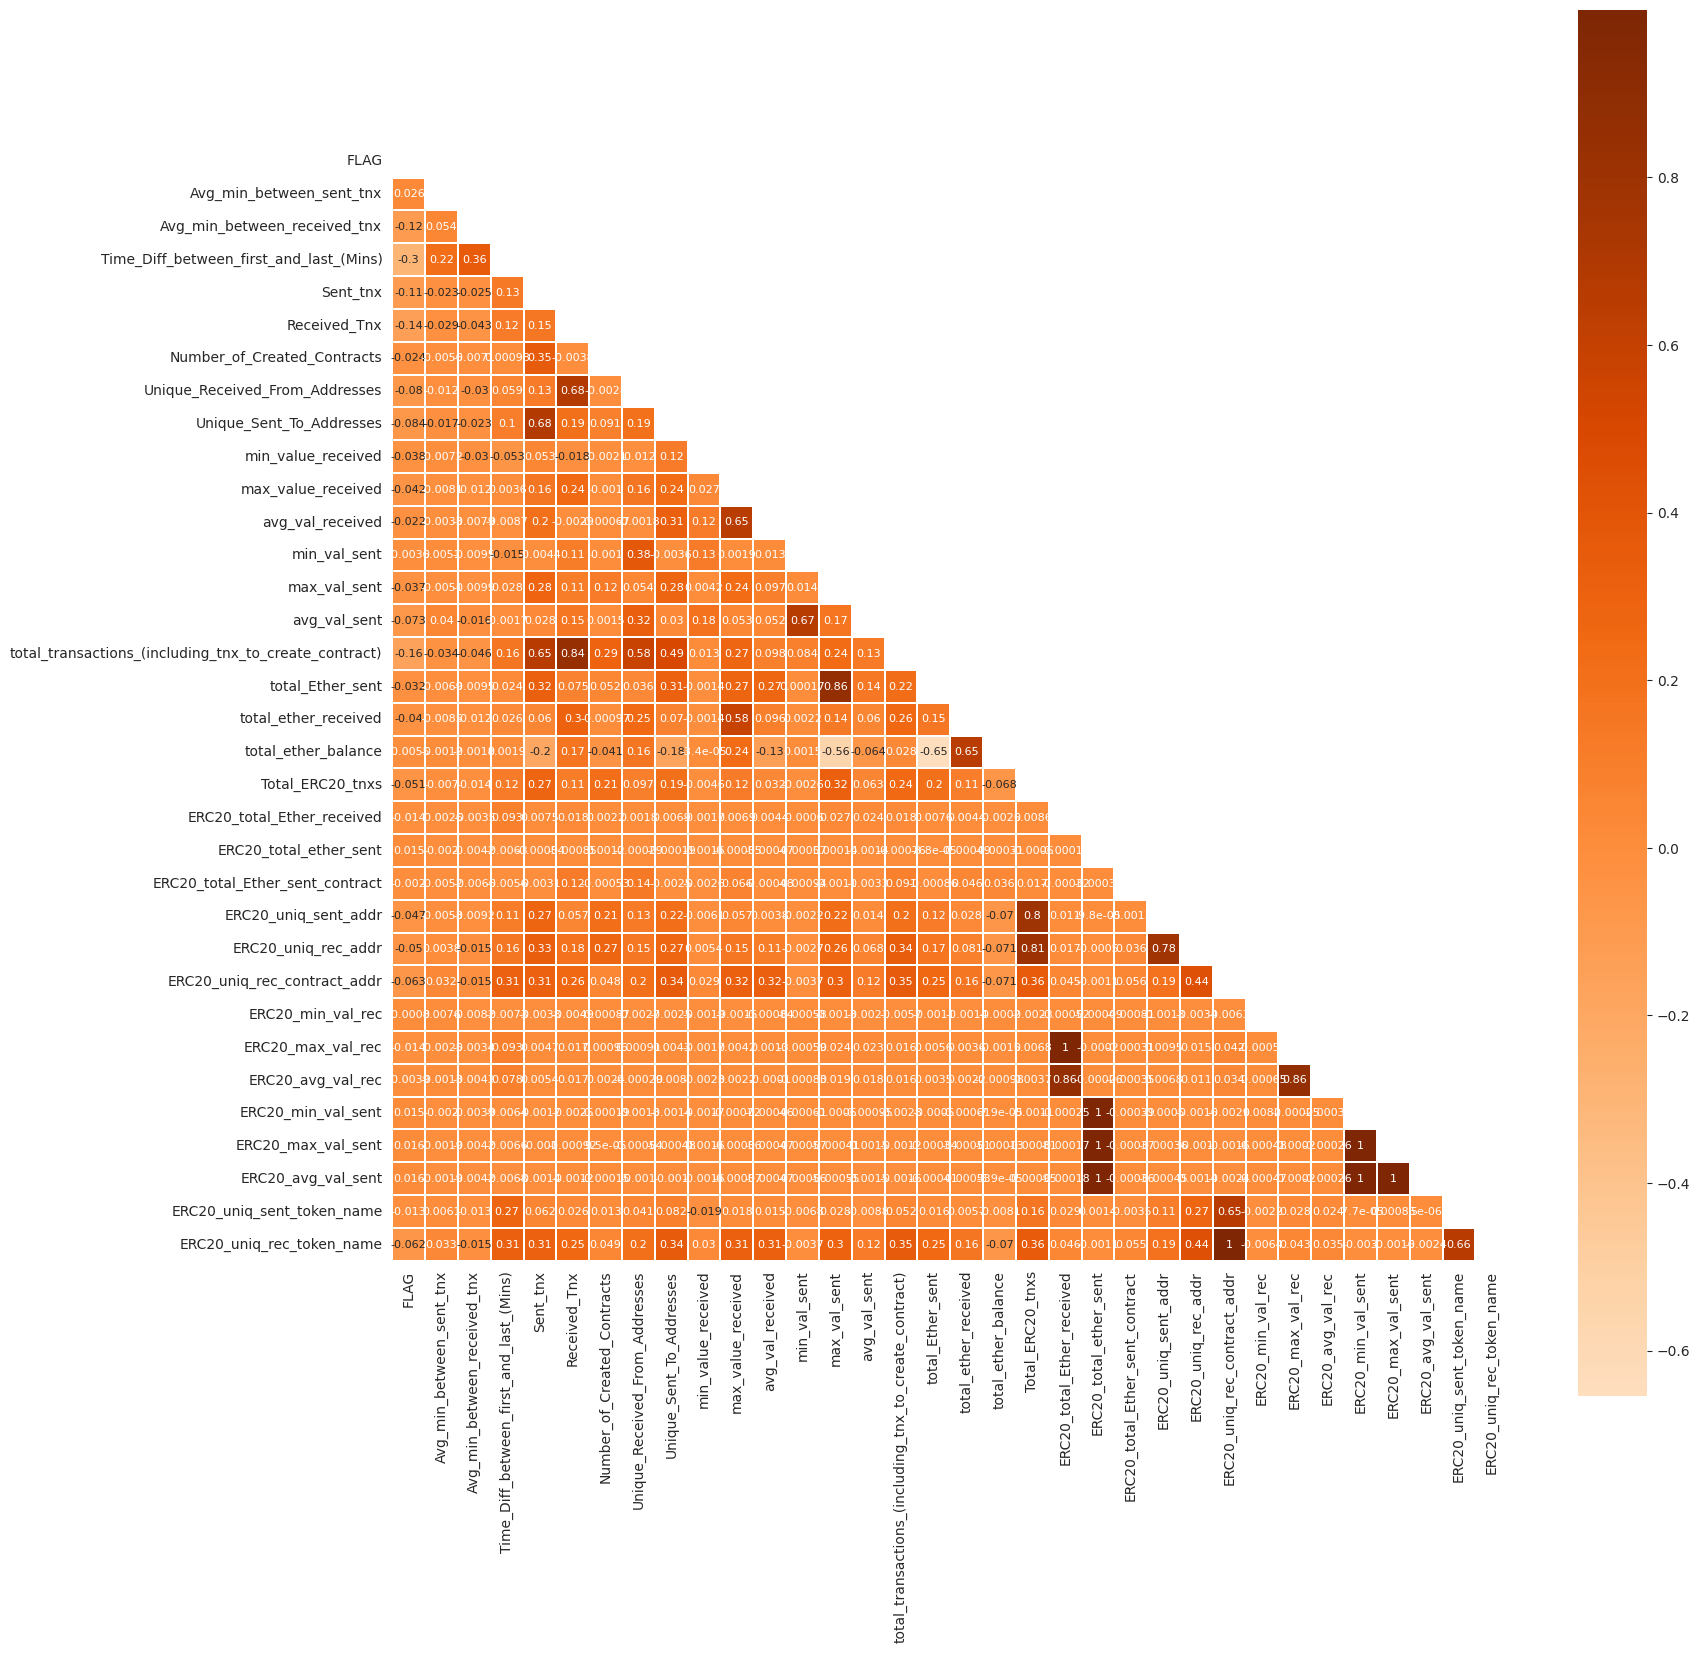

In [25]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18, 18))
    sns.heatmap(corr, mask=mask, cmap='Oranges', square=True, annot=True, annot_kws={'size': 8}, center=0, linewidths=0.1)

Training the data

In [26]:
X = df.iloc[:, 1:]
y = df['FLAG']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [28]:
scaler = StandardScaler()
sc_train = scaler.fit_transform(X_train)

In [29]:
over_sampler = imb.over_sampling.SMOTE()
X_tr_resample, y_tr_resample = over_sampler.fit_resample(sc_train, y_train)

In [30]:
#Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1
print(f'BEFORE OVERSAMPLING \n \tNo of Non-frauds: {non_fraud} \n \tNo of Fauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNo of Non-frauds: {no} \n \t No of Fauds: {yes}')


BEFORE OVERSAMPLING 
 	No of Non-frauds: 1997 
 	No of Fauds: 1747
AFTER OVERSAMPLING 
 	No of Non-frauds: 1997 
 	 No of Fauds: 1998


1.Logistic Regression

In [31]:
def lg_reg(X_train, X_test, y_train, y_test, ):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.RED + "            Logistic Regression Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix: {sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Reds")}')
    plt.show()

            Logistic Regression Classifier       


Accuracy  : 0.6606189967982924
Precision : 0.5874233128834356
Recall    : 0.8865740740740741
f1 score  : 0.7066420664206642


              precision    recall  f1-score   support

           0       0.83      0.47      0.60       505
           1       0.59      0.89      0.71       432

    accuracy                           0.66       937
   macro avg       0.71      0.68      0.65       937
weighted avg       0.72      0.66      0.65       937

Confusion Matrix: Axes(0.125,0.11;0.62x0.77)


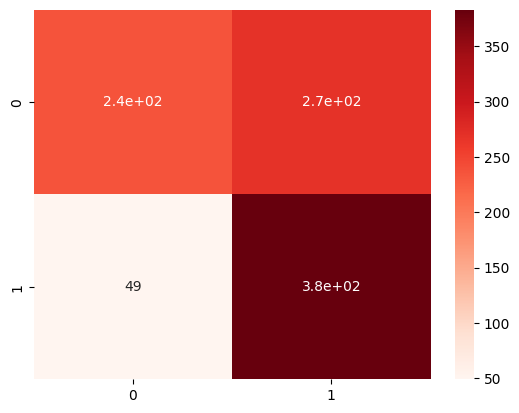

In [32]:
X_test = scaler.transform(X_test)
lg_reg(X_tr_resample,X_test, y_tr_resample, y_test)

2.ADABoost Classifier

In [33]:
def ada_b(X_train, X_test, y_train, y_test):
    model = AdaBoostClassifier()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.MAGENTA +"            AdaBoost Classifier     \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="coolwarm")}')
    plt.show()

            AdaBoost Classifier     


Accuracy  : 0.9818569903948773
Precision : 0.9705215419501134
Recall    : 0.9907407407407407
f1 score  : 0.9805269186712485


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       505
           1       0.97      0.99      0.98       432

    accuracy                           0.98       937
   macro avg       0.98      0.98      0.98       937
weighted avg       0.98      0.98      0.98       937

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


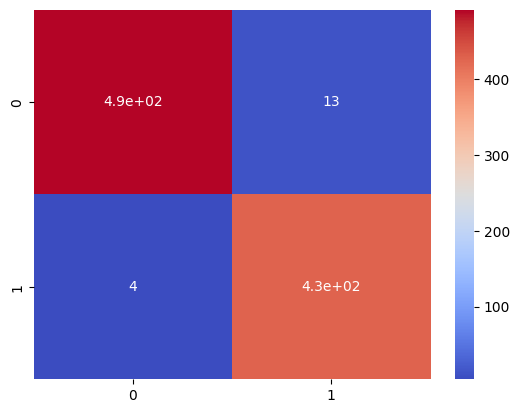

In [34]:
ada_b(X_tr_resample, X_test, y_tr_resample, y_test)

3.Support Vector Machine

            Support Vector Classifier     


Accuracy  : 0.7801494130202775
Precision : 0.706959706959707
Recall    : 0.8935185185185185
f1 score  : 0.7893660531697342


              precision    recall  f1-score   support

           0       0.88      0.68      0.77       505
           1       0.71      0.89      0.79       432

    accuracy                           0.78       937
   macro avg       0.79      0.79      0.78       937
weighted avg       0.80      0.78      0.78       937

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


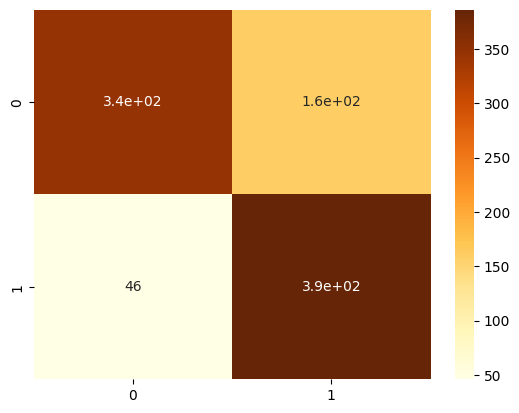

In [35]:
def svm_c(X_train, X_test, y_train, y_test):
    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.LIGHTRED_EX +"            Support Vector Classifier     \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="YlOrBr")}')
    plt.show()

svm_c(X_tr_resample, X_test, y_tr_resample, y_test)

4.Random Forest Classifier

             Random Forest Classifier       


Accuracy  : 0.9775880469583778
Precision : 0.959731543624161
Recall    : 0.9930555555555556
f1 score  : 0.9761092150170648


              precision    recall  f1-score   support

           0       0.99      0.96      0.98       505
           1       0.96      0.99      0.98       432

    accuracy                           0.98       937
   macro avg       0.98      0.98      0.98       937
weighted avg       0.98      0.98      0.98       937

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


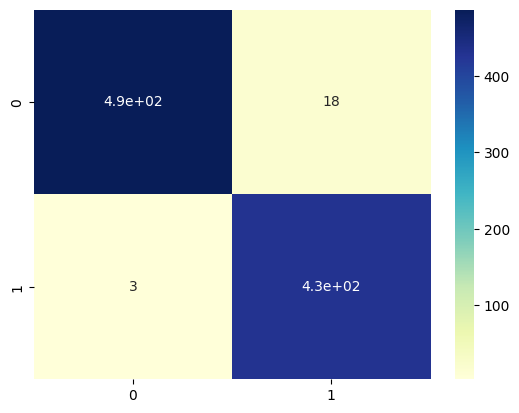

In [49]:
def RF(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=1100, max_depth=27)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.GREEN +"             Random Forest Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="YlGnBu" )}')
    plt.show()
RF(X_tr_resample, X_test, y_tr_resample, y_test)

5.Catboost Classifier

0:	learn: 0.6831836	total: 23.6ms	remaining: 23.6s
1:	learn: 0.6735500	total: 50.2ms	remaining: 25.1s
2:	learn: 0.6638004	total: 70.9ms	remaining: 23.6s
3:	learn: 0.6538536	total: 101ms	remaining: 25.2s
4:	learn: 0.6469706	total: 126ms	remaining: 25.2s
5:	learn: 0.6390844	total: 153ms	remaining: 25.3s
6:	learn: 0.6304259	total: 190ms	remaining: 26.9s
7:	learn: 0.6230044	total: 216ms	remaining: 26.7s
8:	learn: 0.6142915	total: 241ms	remaining: 26.5s
9:	learn: 0.6059861	total: 260ms	remaining: 25.7s
10:	learn: 0.5975912	total: 281ms	remaining: 25.3s
11:	learn: 0.5888743	total: 301ms	remaining: 24.8s
12:	learn: 0.5804153	total: 329ms	remaining: 25s
13:	learn: 0.5726659	total: 362ms	remaining: 25.5s
14:	learn: 0.5663355	total: 384ms	remaining: 25.2s
15:	learn: 0.5594433	total: 405ms	remaining: 24.9s
16:	learn: 0.5512068	total: 427ms	remaining: 24.7s
17:	learn: 0.5437553	total: 446ms	remaining: 24.3s
18:	learn: 0.5384266	total: 464ms	remaining: 24s
19:	learn: 0.5325578	total: 482ms	remainin

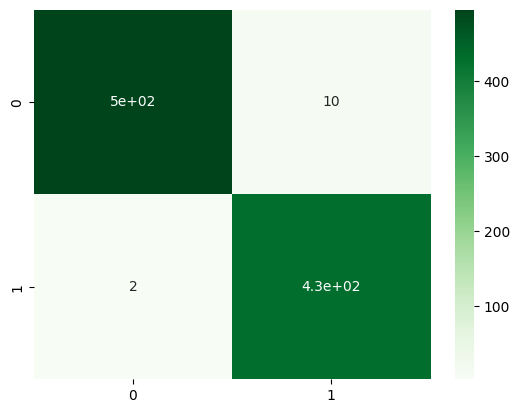

In [57]:
def cat_b(X_train, X_test, y_train, y_test):
    model = ctb.CatBoostClassifier(learning_rate=0.005, verbose=1)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.CYAN +"             Catboost Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Greens" )}')
    plt.show()
cat_b(X_tr_resample, X_test, y_tr_resample, y_test)

6.XGBoost Classifier

         Extrem Gradient Boosting Classifier       


Accuracy  : 0.9893276414087513
Precision : 0.9839449541284404
Recall    : 0.9930555555555556
f1 score  : 0.9884792626728112


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       505
           1       0.98      0.99      0.99       432

    accuracy                           0.99       937
   macro avg       0.99      0.99      0.99       937
weighted avg       0.99      0.99      0.99       937

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


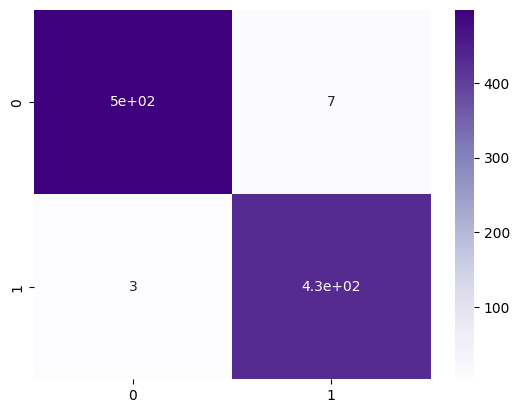

In [58]:
def xgb_c(X_train, X_test, y_train, y_test):
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.BLUE +"         Extrem Gradient Boosting Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Purples" )}')
    plt.show()

xgb_c(X_tr_resample, X_test, y_tr_resample, y_test)

In [59]:
model = xgb.XGBClassifier()
model.fit(X_tr_resample, y_tr_resample,)
y_pred = model.predict(X_test)
round(f1_score(y_test, y_pred), 2)

0.99

Hyperparameter tunig for XGBoost Classifier

In [60]:
# params = {'learning_rate': [0.01, 0.02, 0.05],
#          'max_depth': [5, 6, 7],
#          'n_estimators': [200, 300, 400, 500],
#          'gamma': [0.1, 0.2]}
# grid = GridSearchCV(estimator=model, param_grid=params, scoring='f1', verbose=0)

# grid.fit(X_tr_resample, y_tr_resample)

# print(f'Best Parameters: {grid.best_params_}')
# print(f'Best Estimator : {grid.best_estimator_}')
# print(f'Best f1 Score  : {round(grid.best_score_, 3)}')

In [87]:
def classification_evaluation(y_true, y_pred):
    print(f'        Model Evaluation       ')
    print(f'ACCURACY : {accuracy_score(y_true, y_pred):.3f}')
    print(f'RECALL   : {recall_score(y_true, y_pred):.3f}')
    print(f'PRECISION: {precision_score(y_true, y_pred):.3f}')
    print(f'F1 SCORE : {f1_score(y_true, y_pred):.3f}')


In [136]:
best_model_xgb = xgb.XGBClassifier(
    gamma=0.7, learning_rate=0.005,max_delta_step=0, max_depth=23,n_estimators=1100,
              )


best_model_xgb.fit(X_tr_resample, y_tr_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.7, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=23, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [137]:
y_pred_train = best_model_xgb.predict(X_tr_resample)
print('Train Set: ')
classification_evaluation(y_tr_resample, y_pred_train)

Train Set: 
        Model Evaluation       
ACCURACY : 1.000
RECALL   : 0.999
PRECISION: 1.000
F1 SCORE : 1.000


In [138]:
y_pred_test = best_model_xgb.predict(X_test)
print('Test Set: ')
classification_evaluation(y_test, y_pred_test)

Test Set: 
        Model Evaluation       
ACCURACY : 0.984
RECALL   : 0.981
PRECISION: 0.984
F1 SCORE : 0.983


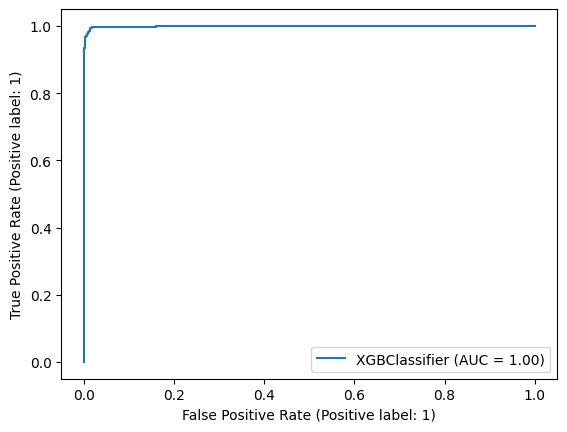

In [131]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model,
               X_test, y_test)
plt.show()

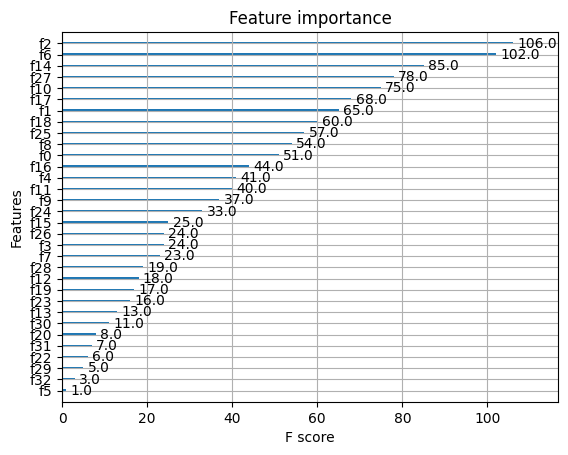

In [132]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [139]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the model
model = XGBClassifier()

# Define the parameters grid
param_grid = {
    'gamma': [0, 0.1, 0.5, 1],
    'max_delta_step': [0, 1, 5],
    'max_depth': [3, 6, 9, 12],
    'n_estimators': [50, 100, 200, 300]
}

# Set up the cross-validation strategy
kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Set up the grid search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=kfold, verbose=3)

# Fit grid_search to the data
grid_search.fit(X, y)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 7 folds for each of 192 candidates, totalling 1344 fits
Best parameters found:  {'gamma': 0, 'max_delta_step': 0, 'max_depth': 3, 'n_estimators': 100}
Best accuracy found:  0.9856884565270485
